In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('chesterish')
# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
# Now we'll learn how to visualize multiple regression with lmplot()

# Luckily, Seaborn comes with an example dataset to use as a pandas DataFrame
tips = sns.load_dataset("tips")

In [3]:
# Preview
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


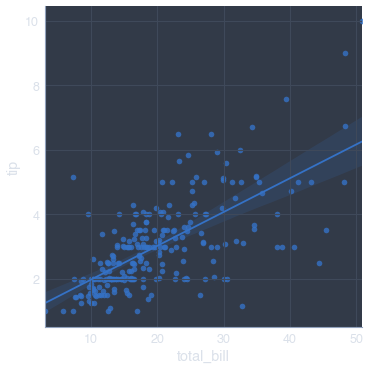

In [9]:
sns.lmplot(x="total_bill", y="tip", data=tips)

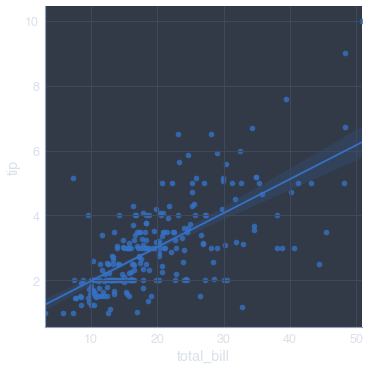

In [10]:
# specify the confidence interval, for example;
sns.lmplot(x="total_bill", y='tip',data=tips, ci=76)

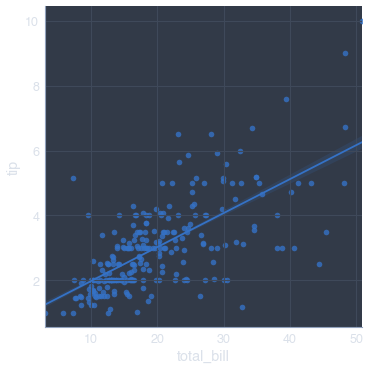

In [11]:
sns.lmplot(x="total_bill", y='tip',data=tips, ci=40)

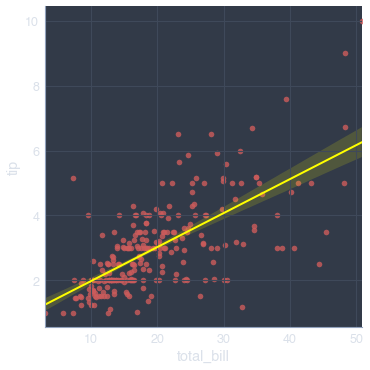

In [17]:
# sue of dictionaries to change individual parts of the plot;
sns.lmplot(x='total_bill', y='tip',data=tips,
          scatter_kws={'marker': 'o', 'color': 'indianred'},
          line_kws={'linewidth':2, 'color': 'yellow'}, 
          ci=75)

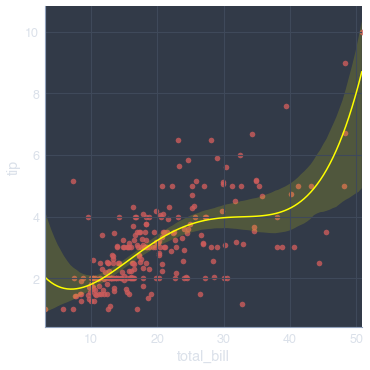

In [22]:
# WE can also check out higher-order trends
sns.lmplot(x="total_bill", y="tip", data=tips,order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1.5, "color": "yellow"})

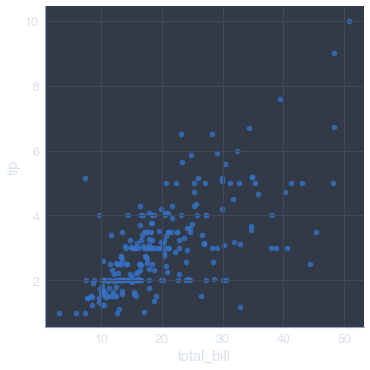

In [24]:
# We can also not fit a regression if desired
sns.lmplot(x="total_bill", y="tip", data=tips,fit_reg=False)

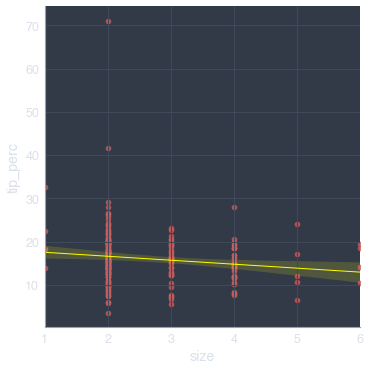

In [33]:
# lmplot() also works on discrete variables, such as the percentage of the tip

# Create a new column for tip percentage
tips["tip_perc"]=100*(tips['tip']/tips['total_bill'])
#plot
sns.lmplot(x="size", y="tip_perc", data=tips,
          scatter_kws={'marker': 'o', 'color':'indianred'},
          line_kws={'linewidth':1, 'color': 'yellow'});

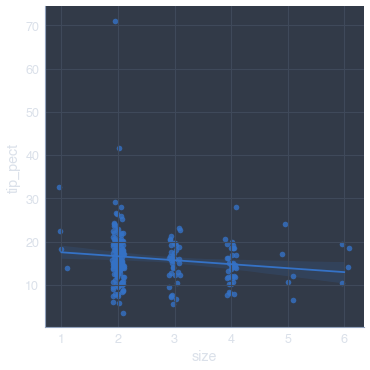

In [49]:
# We can also add jitter to this

#Info link
url = "http://en.wikipedia.org/wiki/Jitter"

#plot
sns.lmplot(x="size", y="tip_pect", data=tips,x_jitter=.1);

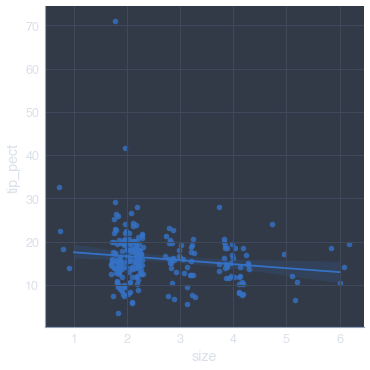

In [40]:
sns.lmplot(x="size", y="tip_pect", data=tips,x_jitter=.3);

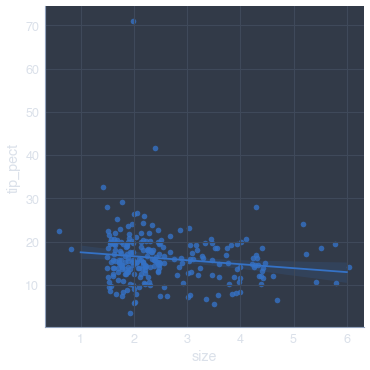

In [41]:
sns.lmplot(x="size", y="tip_pect", data=tips,x_jitter=.5);

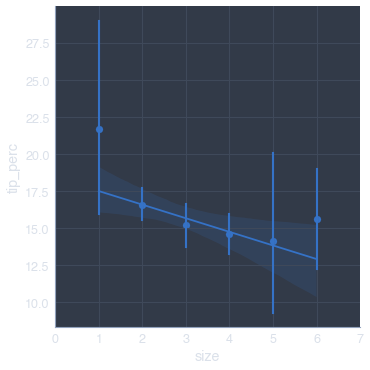

In [60]:

# We can also estimate the tendency of each bin (size of party in this case)
g = sns.lmplot(x="size", y="tip_perc", data=tips, x_estimator=np.mean);
g.set(xlim=(0,7))

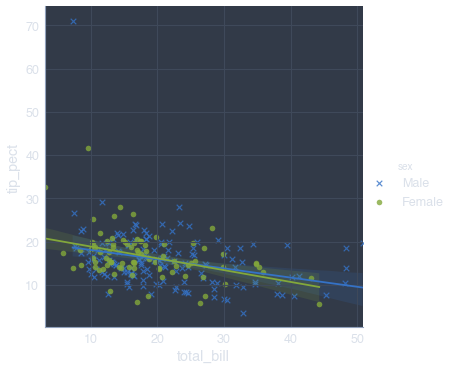

In [61]:

sns.lmplot(x='total_bill', y='tip_pect', data=tips, hue='sex', markers=['x', 'o'])

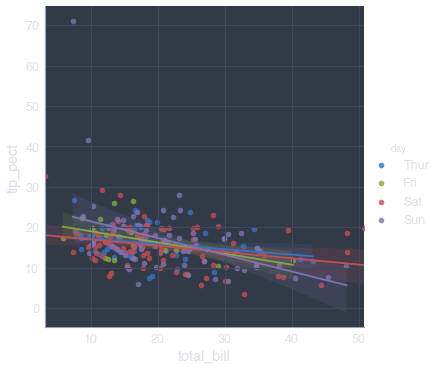

In [63]:

# Does day make a difference?
sns.lmplot(x="total_bill", y="tip_pect", data=tips, hue="day")

/Users/efe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


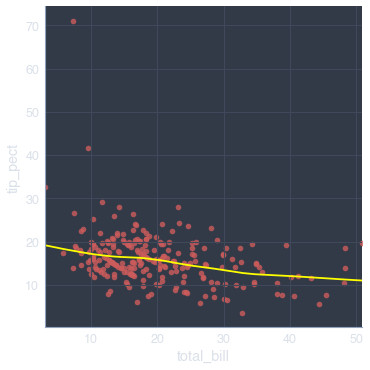

In [65]:
# Finally it should be noted that Seabron supports LOESS model fitting
url = 'http://en.wikipedia.org/wiki/Local_regression'

sns.lmplot("total_bill", "tip_pect", tips, lowess=True, 
           scatter_kws={'color':'indianred'},
           line_kws={"color": 'yellow'});

<AxesSubplot:xlabel='total_bill', ylabel='tip_pect'>

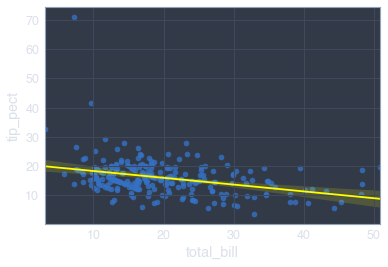

In [68]:

# The lmplot() we've been using is actually using a lower-level function, regplot()

sns.regplot(x="total_bill",y="tip_pect",data=tips,
           line_kws={'color': 'yellow'})

<AxesSubplot:xlabel='size', ylabel='tip_pect'>

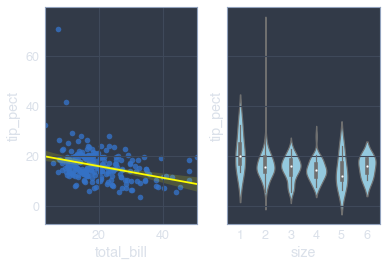

In [97]:
# reg_plot can be added to existing axes without modifying anything in the figure

# Create figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.regplot(x="total_bill",y="tip_pect",data=tips,ax=axis1,
           line_kws={'color':"yellow"})

sns.violinplot(y=tips['tip_pect'], x=tips['size'], color='skyblue', ax=axis2)
